In [8]:
import spacy

In [9]:
from spacy.lang.en import English

# Create the nlp object

nlp = English()

In [18]:
# Created by processing a string of text

doc = nlp('Hello World!')

#Iterate over tokens in doc 

for token in doc:
    print(token)
    
token = doc[1]

#Get the token text via .text attribute
token.text

# A slice from the Doc is a span object
span = doc[1:3]
span.text

Hello
World
!


'World!'

# Here you can see some of the available token attributes:

i is the index of the token within the parent document.

text returns the token text.

is_alpha, is_punct and like_num return boolean values indicating whether the token consists of alphabetic characters, whether it's punctuation or whether it resembles a number. For example, a token "10" – one, zero – or the word "ten" – T, E, N.

These attributes are also called lexical attributes: they refer to the entry in the vocabulary and don't depend on the token's context.

In [19]:
doc = nlp("It costs $5.")

print("Index:   ", [token.i for token in doc])
print("Text:    ", [token.text for token in doc])

print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4]
Text:     ['It', 'costs', '$', '5', '.']
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


# Let’s get started and try out spaCy! In this exercise, you’ll be able to try out some of the 55+ available languages.

Part 1: English
Import the English class from spacy.lang.en and create the nlp object.
Create a doc and print its text.

In [23]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print (doc.text)

lst=[token.text for token in doc]
print (lst)

This is a sentence.
['This', 'is', 'a', 'sentence', '.']


# Part 2: German
Import the German class from spacy.lang.de and create the nlp object.
Create a doc and print its text.

In [34]:
# Import the German language class
from spacy.lang.de import German

# Create the nlp object
nlp = German()

# Process a text (this is German for: "Kind regards!")
doc = nlp("Liebe Grüße!")

# Print the document text
print(doc.text)

Liebe Grüße!


# Part 3: Spanish
Import the Spanish class from spacy.lang.es and create the nlp object.
Create a doc and print its text.

In [35]:
# Import the Spanish language class
from spacy.lang.es import Spanish

# Create the nlp object
nlp = Spanish()

# Process a text (this is Spanish for: "How are you?")
doc = nlp('¿Cómo estás?')

# Print the document text
print(doc.text)

¿Cómo estás?


# Documents, Spans, and Tokens

When you call nlp on a string, spaCy first tokenizes the text and creates a document object. In this exercise, you’ll learn more about the Doc, as well as its views Token and Span.

Step 1
Import the English language class and create the nlp object.

Process the text and instantiate a Doc object in the variable doc.

Select the first token of the Doc and print its text.

In [36]:
# Import the English language class and create the nlp object
from spacy.lang.en import English

nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

I


# Step 2

Import the English language class and create the nlp object.

Process the text and instantiate a Doc object in the variable doc.

Create a slice of the Doc for the tokens “tree kangaroos” and “tree kangaroos and narwhals”.

In [37]:
# Import the English language class and create the nlp object
from spacy.lang.en import English

nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

tree kangaroos
tree kangaroos and narwhals


# Lexical Attribute

In this example, you’ll use spaCy’s Doc and Token objects, and lexical attributes to find percentages in a text. You’ll be looking for two subsequent tokens: a number and a percent sign.

Use the like_num token attribute to check whether a token in the doc resembles a number.

Get the token following the current token in the document. The index of the next token in the doc is token.i + 1.

Check whether the next token’s text attribute is a percent sign ”%“.

In [69]:
from spacy.lang.en import English

nlp = English()

# Process the text
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Percentage found:", token.text)

Percentage found: 60
Percentage found: 4


# What are statistical models?

Enable spaCy to predict linguistic attributes in context

1) Part-of-speech tags

2) Syntactic dependencies

3) Named entities

4) Trained on labeled example texts

5) Can be updated with more examples to fine-tune predictions

Some of the most interesting things you can analyze are context-specific: for example, whether a word is a verb or whether a span of text is a person name.

Statistical models enable spaCy to make predictions in context. This usually includes part-of speech tags, syntactic dependencies and named entities.

Models are trained on large datasets of labeled example texts.

They can be updated with more examples to fine-tune their predictions – for example, to perform better on your specific data.

# Model Packages

spaCy provides a number of pre-trained model packages you can download using the spacy download command. For example, the "en_core_web_sm" package is a small English model that supports all core capabilities and is trained on web text.

The spacy.load method loads a model package by name and returns an nlp object.

The package provides the binary weights that enable spaCy to make predictions.

It also includes the vocabulary, and meta information to tell spaCy which language class to use and how to configure the processing pipeline.

In [90]:
import en_core_web_sm

nlp = en_core_web_sm.load()

# Predicting Parts of Speech Tag

Let's take a look at the model's predictions. In this example, we're using spaCy to predict part-of-speech tags, the word types in context.

First, we load the small English model and receive an nlp object.

Next, we're processing the text "She ate the pizza".

For each token in the doc, we can print the text and the .pos_ attribute, the predicted part-of-speech tag.

In spaCy, attributes that return strings usually end with an underscore – attributes without the underscore return an ID.

Here, the model correctly predicted "ate" as a verb and "pizza" as a noun.

In [83]:
import spacy

# Load the small English model
#nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("She ate the pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


# Predicting Syntactic Dependencies

In addition to the part-of-speech tags, we can also predict how the words are related. For example, whether a word is the subject of the sentence or an object.

The .dep_ attribute returns the predicted dependency label.

The .head attribute returns the syntactic head token. You can also think of it as the parent token this word is attached to.

In [84]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


# Dependency Label Scheme

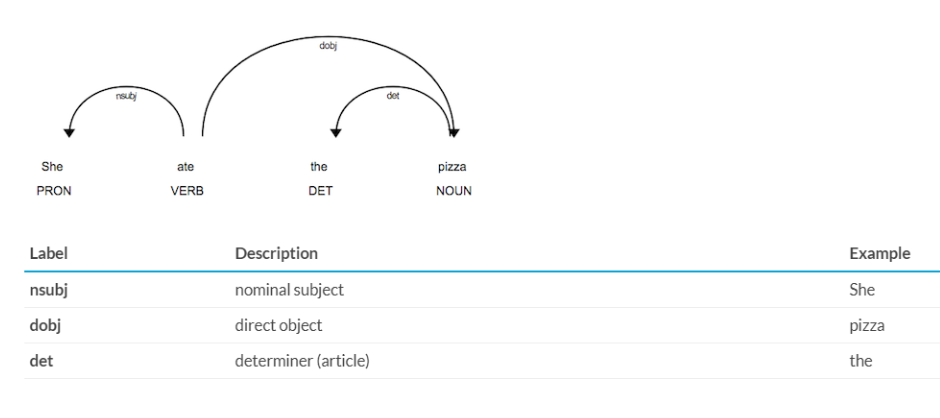

To describe syntactic dependencies, spaCy uses a standardized label scheme. Here's an example of some common labels:


The pronoun "She" is a nominal subject attached to the verb – in this case, to "ate".

The noun "pizza" is a direct object attached to the verb "ate". It is eaten by the subject, "she".

The determiner "the", also known as an article, is attached to the noun "pizza".

# Predicting Named Entities

Named entities are "real world objects" that are assigned a name – for example, a person, an organization or a country.

The doc.ents property lets you access the named entities predicted by the model.

It returns an iterator of Span objects, so we can print the entity text and the entity label using the .label_ attribute.

In this case, the model is correctly predicting "Apple" as an organization, "U.K." as a geopolitical entity and "$1 billion" as money.

In [87]:
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")


# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

ValueError: [E167] Unknown morphological feature: 'Person' (2313063860588076218). This can happen if the tagger was trained with a different set of morphological features. If you're using a pretrained model, make sure that your models are up to date:
python -m spacy validate

In [86]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

she PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


In [91]:
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

ValueError: [E167] Unknown morphological feature: 'Person' (2313063860588076218). This can happen if the tagger was trained with a different set of morphological features. If you're using a pretrained model, make sure that your models are up to date:
python -m spacy validate

In [94]:
spacy.explain('GPE')
spacy.explain("NNP")
spacy.explain("dobj")

'direct object'

# Loading Models

The models we’re using in this course are already pre-installed. For more details on spaCy’s statistical models and how to install them on your machine, see the documentation.

Use spacy.load to load the small English model "en_core_web_sm".
Process the text and print the document text.

In [96]:
import spacy

# Load the "en_core_web_sm" model
import en_core_web_sm

nlp = en_core_web_sm.load()

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value


In [98]:
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


In [99]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

It          PRON      nsubj     
’s          VERB      punct     
official    NOUN      ccomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


# NER

Process the text and create a doc object.

Iterate over the doc.ents and print the entity text and label_ attribute.

In [100]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


# Missing Entities
Process the text with the nlp object.

Iterate over the entities and print the entity text and label.

Looks like the model didn’t predict “iPhone X”. Create a span for those tokens manually.

In [101]:
text = "Upcoming iPhone X release date leaked as Apple reveals pre-orders"

# Process the text
doc = nlp(text)

# Iterate over the entities
for ent in doc.ents:
    # Print the entity text and label
    print(ent.text, ent.label_)

# Get the span for "iPhone X"
iphone_x = doc[1:3]

# Print the span text
print("Missing entity:", iphone_x.text)

Apple ORG
Missing entity: iPhone X


# Rule Based Matching 

In this lesson, we'll take a look at spaCy's matcher, which lets you write rules to find words and phrases in text.

Compared to regular expressions, the matcher works with Doc and Token objects instead of only strings.

It's also more flexible: you can search for texts but also other lexical attributes.

You can even write rules that use the model's predictions.

For example, find the word "duck" only if it's a verb, not a noun.

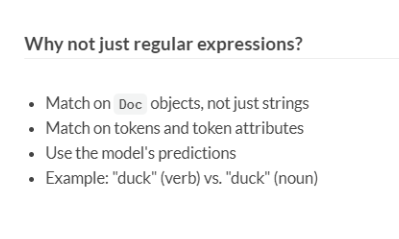

# Rule Based Matching

Match patterns are lists of dictionaries. Each dictionary describes one token. The keys are the names of token attributes, mapped to their expected values.

In this example, we're looking for two tokens with the text "iPhone" and "X".

We can also match on other token attributes. Here, we're looking for two tokens whose lowercase forms equal "iphone" and "x".

We can even write patterns using attributes predicted by the model. Here, we're matching a token with the lemma "buy", plus a noun. The lemma is the base form, so this pattern would match phrases like "buying milk" or "bought flowers".

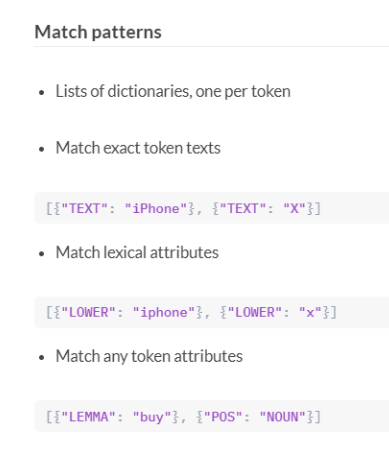


match_id: hash value of the pattern name
start: start index of matched span
end: end index of matched span

In [104]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

# Load a model and create the nlp object
#nlp = spacy.load("en_core_web_sm")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", None, pattern)

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


In [ ]:
# Matching Lexical Attributes

In [107]:
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]

doc = nlp("2018 FIFA World Cup: France won!")



# Call the matcher on the doc
matches = matcher(doc)
matcher.add("PATTERN", None, pattern)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

In [ ]:
pattern = [
    {"LEMMA": "love", "POS": "VERB"},
    {"POS": "NOUN"}
]

doc = nlp("I loved dogs but now I love cats more.")

In [ ]:
pattern = [
    {"LEMMA": "buy"},
    {"POS": "DET", "OP": "?"},  # optional: match 0 or 1 times
    {"POS": "NOUN"}
]

doc = nlp("I bought a smartphone. Now I'm buying apps.")

In [4]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp("Upcoming iPhone X release date leaked as Apple reveals pre-orders")

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{"TExt": "iPhone"}, {"TEXT": "X"}]

# Add the pattern to the matcher
matcher.add("IPHONE_X_PATTERN", None, pattern)

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


In [6]:
doc = nlp(
    "After making the iOS update you won't notice a radical system-wide "
    "redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of "
    "iOS 11's furniture remains the same as in iOS 10. But you will discover "
    "some tweaks once you delve a little deeper."
)

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{"TEXT": "iOS"}, {"IS_DIGIT": True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("IOS_VERSION_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


Write one pattern that only matches forms of “download” (tokens with the lemma “download”), followed by a token with the part-of-speech tag "PROPN" (proper noun).

In [7]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "i downloaded Fortnite on my laptop and can't open the game at all. Help? "
    "so when I was downloading Minecraft, I got the Windows version where it "
    "is the '.zip' folder and I used the default program to unpack it... do "
    "I also need to download Winzip?"
)

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{"LEMMA": 'download'}, {"POS":'PROPN'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("DOWNLOAD_THINGS_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


Write one pattern that matches adjectives ("ADJ") followed by one or two "NOUN"s (one noun and one optional noun).
import spacy

In [8]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses
